In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [3]:
df = pd.read_csv('./csv_files/first_v2_mod.csv', sep = ';')
df.head()

,Unnamed: 0,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link,date_connected,city,region,country
0,0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-06-06,Coventry,NaN,United Kingdom
1,1,Ivan Lafuenti,/in/ivan-l-b7458932/,Design Engineering at Giannuzzi srl,"Brindisi Area, Italy","['2 Mutual Connections', 'You both studied at ...","May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Brindisi,NaN,Italy
2,2,Tiziano Ruggiero,/in/tiziano-ruggiero-2011b2164/,Responsabile del reparto tecnico di produzione...,"Avezzano, Abruzzo, Italy",Tiziano started a new position as Responsabile...,"May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Avezzano,Abruzzo,Italy
3,3,Antonio Guerrieri,/in/antonio-guerrieri/,Ingegnere at Università del Salento,"Lecce, Apulia, Italy",You both studied at Università del Salento,"May 29, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-29,Lecce,Apulia,Italy
4,4,Lorenzo Gagliardi,/in/lorenzo-gagliardi-72049b45/,Ing,"Savona, Liguria, Italy","['19 Mutual Connections', 'You both worked at ...","May 2, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-02,Savona,Liguria,Italy


In [4]:
dc = df['date_connected']
dc_right = []
for data in dc:
    dc_right.append( dt.strptime(data, '%Y-%m-%d'))

#df['date_connected'] = dc_right

In [5]:
df['date_connected'] = dc_right

In [6]:
df.head()

,Unnamed: 0,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link,date_connected,city,region,country
0,0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-06-06,Coventry,NaN,United Kingdom
1,1,Ivan Lafuenti,/in/ivan-l-b7458932/,Design Engineering at Giannuzzi srl,"Brindisi Area, Italy","['2 Mutual Connections', 'You both studied at ...","May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Brindisi,NaN,Italy
2,2,Tiziano Ruggiero,/in/tiziano-ruggiero-2011b2164/,Responsabile del reparto tecnico di produzione...,"Avezzano, Abruzzo, Italy",Tiziano started a new position as Responsabile...,"May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Avezzano,Abruzzo,Italy
3,3,Antonio Guerrieri,/in/antonio-guerrieri/,Ingegnere at Università del Salento,"Lecce, Apulia, Italy",You both studied at Università del Salento,"May 29, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-29,Lecce,Apulia,Italy
4,4,Lorenzo Gagliardi,/in/lorenzo-gagliardi-72049b45/,Ing,"Savona, Liguria, Italy","['19 Mutual Connections', 'You both worked at ...","May 2, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-02,Savona,Liguria,Italy


In [7]:
df['date_connected'][0]

Timestamp('2019-06-06 00:00:00')

In [8]:
res = df['country'].value_counts()
res

United Kingdom          121
Italy                   111
Germany                  15
Spain                    12
China                     5
USA                       5
India                     4
Ireland                   3
France                    2
Brazil                    2
Belgium                   2
Netherlands               2
Turkey                    1
United Arab Emirates      1
Sweden                    1
Japan                     1
Georgia                   1
Canada                    1
Hong Kong                 1
Czech Republic            1
Name: country, dtype: int64

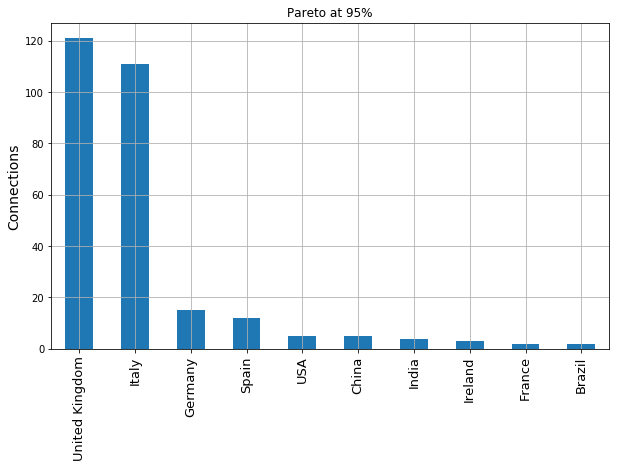

In [39]:
plt.figure(figsize = (10,6))
res.plot(kind = 'bar', grid = True)
plt.ylabel('Connections', fontsize = 14);
plt.xticks(fontsize = 13);
plt.xlim([-0.5,9.5]);
plt.title('Pareto at 95%')
plt.savefig('Country_pareto.png')

In [34]:
rescum = res.cumsum()/293
rescum

United Kingdom          0.412969
Italy                   0.791809
Germany                 0.843003
Spain                   0.883959
USA                     0.901024
China                   0.918089
India                   0.931741
Ireland                 0.941980
France                  0.948805
Brazil                  0.955631
Belgium                 0.962457
Netherlands             0.969283
Turkey                  0.972696
Hong Kong               0.976109
Canada                  0.979522
Georgia                 0.982935
Japan                   0.986348
Sweden                  0.989761
Czech Republic          0.993174
United Arab Emirates    0.996587
Name: country, dtype: float64

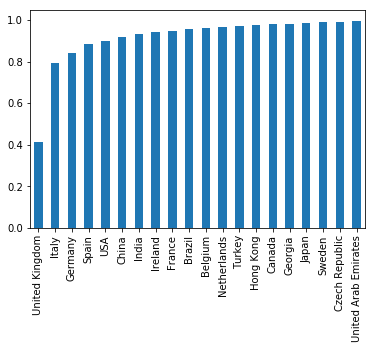

In [36]:
rescum.plot(kind = 'bar')

In [80]:
ix_uk = (df['country'] == 'United Kingdom')
date_uk = df['date_connected'][ix_uk]
date_italy = df['date_connected'][df['country']=='Italy']

(array([12., 11., 14.,  6.,  6.,  8., 13., 16., 12., 23.]),
 array([734929. , 735157.7, 735386.4, 735615.1, 735843.8, 736072.5,
        736301.2, 736529.9, 736758.6, 736987.3, 737216. ]),
 <a list of 10 Patch objects>)

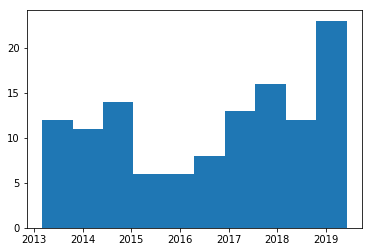

In [81]:
plt.hist(date_uk)

In [10]:
df_country = df.loc[(df['country'] == 'United Kingdom') | (df['country'] == 'Italy')]

In [84]:
df_country.head()

,Unnamed: 0,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link,date_connected,city,region,country
0,0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-06-06,Coventry,NaN,United Kingdom
5,5,Stuart Hubbard,/in/stuarthubbard/,Lead Engineer - CAE Methods &amp; Tools (Suspe...,"Bishop’s Itchington, Warwickshire, United Kingdom","['36 Mutual Connections', 'You both worked at ...","April 25, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-04-25,Bishop’s Itchington,Warwickshire,United Kingdom
6,6,Lily Watson,/in/lily-watson-8b06b0178/,Student at England High School,"London, United Kingdom",19 Mutual Connections,"April 24, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-04-24,London,NaN,United Kingdom
7,7,Mostafa Hashem,/in/mostafa-hashem-93264218/,"Entrepreneur, Analytics and Data Consultant.","Coventry, West Midlands, United Kingdom","['2 Mutual Connections', '1 Mutual Group']","April 16, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-04-16,Coventry,West Midlands,United Kingdom
8,8,Preethi Sekar,/in/preethisekar/,"Engineering Leader - Powertrain Dept, JLR",United Kingdom,"['9 Mutual Connections', 'You both worked at J...","April 2, 2019",NaN,2019-04-02,NaN,NaN,United Kingdom


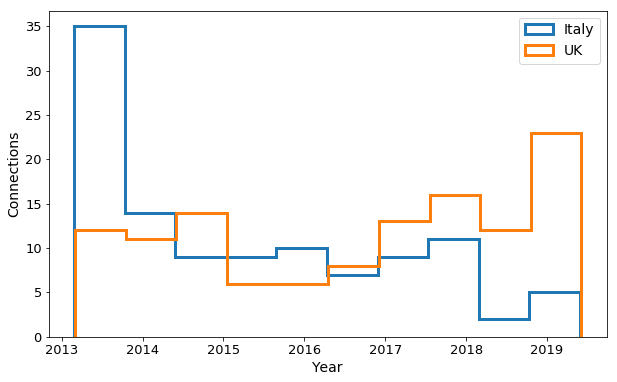

In [21]:
plt.figure(figsize = (10,6))
#yearly_divisions = 1
#req = np.linspace(start = 734925-55, stop = 737216+210, num = 7*yearly_divisions+1)

df_country.groupby('country')['date_connected'].hist(histtype = 'step', bins = 10, grid = False, lw = 3)
plt.legend(['Italy','UK'],fontsize = 14);
plt.ylabel('Connections', fontsize=14);
plt.xlabel('Year', fontsize = 14)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
#plt.savefig('Dates_UK_Italy.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018349D97C18>,
      dtype=object)

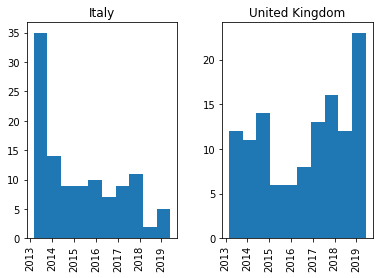

In [91]:
df_country.hist(column = 'date_connected', by = 'country')